
# <center> ECSE 415: Introduction to Computer Vision 
## <center>Assigment 3: Advanced Computer Vision
<center>Author: Karim Elgammal (260920556)

In [ ]:
#README

## ECSE 415, INTRODUCTION TO COMPUTER VISION: ASSIGNMENT 3, March 27th, 2023
# 
# This project serves as an introduction to computer vision techniques deployed for three main functionalities: 
# 1. Image Classification Using Convultion Neaural Network
# 2. Stereo Vision
# 3. Motion Algorithms
#
## Getting Started
# In order to run the project correctly, each cell of code present should be ran in the order they appear, this is because some later cells depend on the
# functionalities implmented in previous ones. Also note that each cell should be ran exactly once before the next one is ran, 
#this is because some functions are shared accross cells. 
#
## Prerequisites
# Must extend the usage of the following libraries: NumPy, SkLearn, Scikit-Imag, os, OpenCV, Torch, Torchvision and Matplotlib. 
# 
#
## License
# This project is a student project created for academic purposes at McGill University. It is not intended for commercial use and is protected under Canadian Law. 
# Permission is hereby granted for individuals within McGill University to view this project for educational purposes only. Any other use, including commercial use, redistribution, or publication is strictly prohibited. 
# This project is provided "as is" without warranty of any kind, either express or implied. McGill University and the student(s) who created this project shall not be liable for any damages resulting from the use of this project.
#
#
## Acknowledgments
# Much of the implementation of this project was only feasible due to the tutorial sessions held by A.Kumar. who is listed within the works cited at the end of the document. 
# Further it is noted that many implementations of the code below were only possible after adhering to the structure and methods referred to in lectures and tutorials of ECSE 415. 


<p align="justify">This assigment is composed of three main parts, first, an exploration of image classification with Convultion Neaural Networks, then stereo vision and finally motion detection between frames. 

---
##1. Image Classification with Convolution Neural Network (CNN) and Naïve Bayes
<p align="justify">Within this part of the assignment we are tasked to clasify MNIST digits into 10 categories using a Convolution Neural Network, and then attempting the very same procedure with a Naive Bayes classifier. 


#####1.1 CNN Implementation
We were first tasked in training a CNN with respect to the following layers within the network: 

- A convolution layer with 32 kernels of size 3 × 3.
- A ReLU activation.
- A convolution layer with 64 kernels of size 3 × 3.
- A ReLU activation.
- A maxpool layer with kernels of size 2 × 2.
- A convolution layer with 64 kernels of size 3 × 3.
- A ReLU activation.
- A convolution layer with 64 kernels of size 3 × 3.
- A ReLU activation.
- A flattening layer. 
- A Linear layer with output size of 10.

<p align="justify">And so, in order to achieve this, we first installed the dependancies that are needed to complete this implementation; more specifically, opencv's extended libraries. Further, it is noted that an implementation using tensors was chosen in order to enhance computation time and run the program on the GPU. Then, we loaded the training set and the testing set supplied by torchvision on MNIST to variables and 'loaders'. Moreover, we implemented a transformation pipeline in order to process all the images in the same way, which allows it to be compatible with the neaural network being implemented. Then we define a custom PyTorch neural network module that inherits from nn.Module. This definition includes defining the init function, which establishes the layers of the CNN we described above, and defining the forward function, the forward pass of the neural network. It is noted that this implementation is based on that of the implementation conducted in tutorial 3 by A.Kumar. Further, the value of transofrmation of (0.1307,) and (0.3081,) used for normalization in the given code, are commonly found values in various online resources, but most prominent is The MNIST Database of Handwritten Digits by LeCun, Y., Cortes, C., and Burges, C. J. C. [1]

<p align="justify"> As seen from the code below, we then commenced to train the network by instantiating the CNN model. The training is set up using CrossEntropyLoss as the loss function and Stochastic Gradient Descent (SGD) as the optimizer. As seen from the script, the training loop iterates over the dataset for 10 epochs, processing data in mini-batches. For each mini-batch, the model undergoes a forward pass, loss calculation, backward pass, and parameter updates. During training, the model's accuracy is calculated by comparing the predicted labels with the ground-truth labels, and the training loss and accuracy are printed every 1800 mini-batches, equivelent to a 'stage' or epoch in training. 

In [ ]:
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 MB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.4.0.44 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-contrib-python==4.4.0.44


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# Pipeline name: transform
#
# Input: An image we plan on feeding into the network, training or testing
#
# Output: returns the image transformed by way of conversion to tensor and normalizing for a grayscale image. 
#
#Adapted from: 
#Amar, Kumar (2023). ECSE 415, Tutorial 7. 
#

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])  # Updated normalization for a single channel


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = tuple(range(10))


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.fc1 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = torch.flatten(x, 1) # Flatten the tensor
        x = self.fc1(x)
        return x

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Function/Class name: CNN Training
#
# Description: This section of codep is adapted from tutorial 7 of McGill's ECSE 415 class. The segement of code instantiates a 
# CNN based on the initializations defined above. Then the training is set up using CrossEntropyLoss as the loss function 
# and Stochastic Gradient Descent (SGD) as the optimizer. 
#
#Adapted from: 
#Amar, Kumar (2023). ECSE 415, Tutorial 7. 
#
# CNN Training
# Instantiate the CNN model
net = CNN()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        #get the inputs 
        inputs, labels = data

        #Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 1800 == 1799:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 1800, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

[1,  1800] loss: 1.263, accuracy: 65.17%
[2,  1800] loss: 0.379, accuracy: 88.66%
[3,  1800] loss: 0.292, accuracy: 91.40%
[4,  1800] loss: 0.218, accuracy: 93.61%
[5,  1800] loss: 0.167, accuracy: 95.13%
[6,  1800] loss: 0.136, accuracy: 95.92%
[7,  1800] loss: 0.116, accuracy: 96.56%
[8,  1800] loss: 0.103, accuracy: 96.90%
[9,  1800] loss: 0.095, accuracy: 97.18%
[10,  1800] loss: 0.087, accuracy: 97.37%
Finished Training


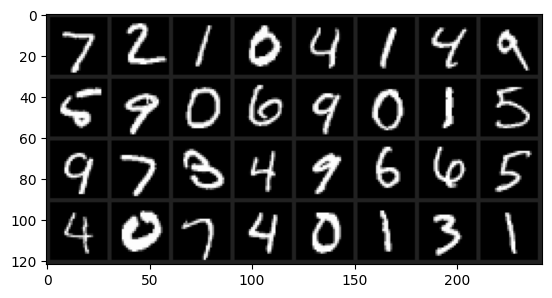

Predicted:
    7     2     1     0     4     1     4     9
    5     9     0     6     9     0     1     5
    9     7     3     4     9     6     6     5
    4     0     7     4     0     1     3     1
GroundTruth:
    7     2     1     0     4     1     4     9
    5     9     0     6     9     0     1     5
    9     7     3     4     9     6     6     5
    4     0     7     4     0     1     3     1
Accuracy of the network on the 10000 test images: 97 %


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(testloader)
images, labels = next(dataiter)

def imshow(img):
    img = img * 0.3081 + 0.1307  # unnormalize (using MNIST mean and std)
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()


images = images.to(device)
outputs = net(images)

_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))


print("Predicted:")
for i in range(4):
    print(' '.join('%5s' % classes[predicted[j]] for j in range(i * 8, (i + 1) * 8)))


#print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range()))
print("GroundTruth:")
for i in range(4):
    print(' '.join('%5s' % classes[labels[j]] for j in range(i * 8, (i + 1) * 8)))


correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

<p align="justify">As seen from the results printed above, the CNN behaves as expected; with accuracy increasing at each epoch, signifiying that our neural network is learning the training data set. Further, we can observe the loss metric decreasing upon each epoch, signifiying that the model's perdictions are getting better at matching to the ground truth. 

<p align="justify">Once we implemented a relatively accuracte network, we ran the testing set through it to achieve the grid output seen above. As seen from the figure above, every number in the 32 testing set was perdicted accurately. Furthermore, we conducted this analysis on the entire testing dataset to achieve an accuracy of 97% for the 10000 images within the MNIST dataset. It is noted that this implementation mmatches that of the tutorial by Amar Kumar. 

####1.2 Effects of Batch Size on CNNs
<p align="justify">We were then tasked to demonstrate the effects of the batch size parameter on the performance of our implemented CNN. In order to do this, we had to retrain the neural network on the specified batch size. The batch size parameter is the number of samples used in one training step, affecting the speed and accuracy balance of the learning process. We decided to perform 4 trials with batch sizes of 4, 8, 12 and 16; allowing us to gauge the effects of this parameter on the performance of the network. 

#####A. Batch Size = 4

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


trainset2 = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=4,
                                          shuffle=True, num_workers=2)

testset2 = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader2 = torch.utils.data.DataLoader(testset2, batch_size=4,
                                         shuffle=False, num_workers=2)


# Instantiate the CNN model
net2 = CNN()

# # If you want to train the model on GPU (if available)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net2 = net2.to(device)


criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 14400 == 14399:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 14400, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')


correct = 0
total = 0
with torch.no_grad():
    for data in testloader2:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images, with Batch Size of 4: %d %%' % (
    100 * correct / total))

[1, 14400] loss: 0.343, accuracy: 90.08%
[2, 14400] loss: 0.094, accuracy: 97.15%
[3, 14400] loss: 0.069, accuracy: 97.92%
[4, 14400] loss: 0.054, accuracy: 98.36%
[5, 14400] loss: 0.047, accuracy: 98.56%
[6, 14400] loss: 0.039, accuracy: 98.80%
[7, 14400] loss: 0.034, accuracy: 98.92%
[8, 14400] loss: 0.030, accuracy: 99.06%
[9, 14400] loss: 0.027, accuracy: 99.17%
[10, 14400] loss: 0.025, accuracy: 99.25%
Finished Training
Accuracy of the network on the 10000 test images, with Batch Size of 4: 98 %


#####B. Batch Size = 8

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


trainset3 = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader3 = torch.utils.data.DataLoader(trainset3, batch_size=8,
                                          shuffle=True, num_workers=2)

testset3 = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader3 = torch.utils.data.DataLoader(testset3, batch_size=8,
                                         shuffle=False, num_workers=2)


# Instantiate the CNN model
net3 = CNN()

# # If you want to train the model on GPU (if available)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net3 = net3.to(device)


criterion3 = nn.CrossEntropyLoss()
optimizer3 = optim.SGD(net3.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader3, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer3.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion3(outputs, labels)
        loss.backward()
        optimizer3.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 7500 == 7499:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 7500, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader3:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images, with Batch Size of 8: %d %%' % (
    100 * correct / total))

[1,  7500] loss: 0.477, accuracy: 85.91%
[2,  7500] loss: 0.140, accuracy: 95.79%
[3,  7500] loss: 0.097, accuracy: 97.07%
[4,  7500] loss: 0.078, accuracy: 97.68%
[5,  7500] loss: 0.066, accuracy: 98.01%
[6,  7500] loss: 0.058, accuracy: 98.24%
[7,  7500] loss: 0.052, accuracy: 98.45%
[8,  7500] loss: 0.046, accuracy: 98.56%
[9,  7500] loss: 0.042, accuracy: 98.77%
[10,  7500] loss: 0.038, accuracy: 98.84%
Finished Training
Accuracy of the network on the 10000 test images, with Batch Size of 8: 98 %


#####C. Batch Size = 12

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


trainset4 = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader4 = torch.utils.data.DataLoader(trainset4, batch_size=12,
                                          shuffle=True, num_workers=2)

testset4 = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader4 = torch.utils.data.DataLoader(testset4, batch_size=12,
                                         shuffle=False, num_workers=2)


# Instantiate the CNN model
net4 = CNN()

# # If you want to train the model on GPU (if available)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net4 = net4.to(device)


criterion4 = nn.CrossEntropyLoss()
optimizer4 = optim.SGD(net4.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader4, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer4.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion4(outputs, labels)
        loss.backward()
        optimizer4.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 5000 == 4999:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 5000, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader4:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images, with Batch Size of 12: %d %%' % (
    100 * correct / total))

[1,  5000] loss: 0.745, accuracy: 78.07%
[2,  5000] loss: 0.204, accuracy: 93.94%
[3,  5000] loss: 0.126, accuracy: 96.22%
[4,  5000] loss: 0.098, accuracy: 97.07%
[5,  5000] loss: 0.083, accuracy: 97.53%
[6,  5000] loss: 0.072, accuracy: 97.81%
[7,  5000] loss: 0.065, accuracy: 98.08%
[8,  5000] loss: 0.059, accuracy: 98.24%
[9,  5000] loss: 0.053, accuracy: 98.37%
[10,  5000] loss: 0.049, accuracy: 98.46%
Finished Training
Accuracy of the network on the 10000 test images, with Batch Size of 12: 98 %


#####D. Batch Size = 16

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


trainset5 = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader5 = torch.utils.data.DataLoader(trainset5, batch_size=16,
                                          shuffle=True, num_workers=2)

testset5 = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader5 = torch.utils.data.DataLoader(testset5, batch_size=16,
                                         shuffle=False, num_workers=2)


# Instantiate the CNN model
net5 = CNN()

# # If you want to train the model on GPU (if available)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net5 = net5.to(device)


criterion5 = nn.CrossEntropyLoss()
optimizer5 = optim.SGD(net5.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader5, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer5.zero_grad()

        # forward + backward + optimize
        outputs = net5(inputs)
        loss = criterion5(outputs, labels)
        loss.backward()
        optimizer5.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 3700 == 3699:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 3700, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader5:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = net5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images, with Batch Size of 16: %d %%' % (
    100 * correct / total))

[1,  3700] loss: 0.740, accuracy: 79.07%
[2,  3700] loss: 0.226, accuracy: 93.46%
[3,  3700] loss: 0.146, accuracy: 95.69%
[4,  3700] loss: 0.113, accuracy: 96.60%
[5,  3700] loss: 0.096, accuracy: 97.11%
[6,  3700] loss: 0.083, accuracy: 97.55%
[7,  3700] loss: 0.074, accuracy: 97.80%
[8,  3700] loss: 0.067, accuracy: 97.98%
[9,  3700] loss: 0.062, accuracy: 98.17%
[10,  3700] loss: 0.058, accuracy: 98.26%
Finished Training
Accuracy of the network on the 10000 test images, with Batch Size of 16: 98 %


<p align="justify">As seen from the results above, it can be gathered that a lower batch size has lead to a much higher computation time, with our results reporting 9, 5, 3, 2 and 1 minutes for runtime for each of 4, 8, 12, 16 and 32 batch sizes. This can be justified by the fact that a lower batch size, means that the the model's weights are updated more frequently, as each iteration processes fewer samples [2]. And so, due to the increased number of iterations required to process the entire dataset, smaller batch sizes lead to longer training times. 

<p align="justify">We observe a similar relationship with its effects on accuracy, where when the batch size decreases, the accuracy of the net at perdictions is higher. This can be seen accross the training epochs of each instance of the trial; where generally, a higher accuracy is sustained accross the different stages of training, including the accuracy of the very first epoch. Further, this is solidified as we see that the 32 batch size resulted in an accuracy of 97%, while the batch size of 4 resulted in 98% accuracy. As mentioned above, a smaller batch size results in a higher number of iterations as each iteration processes a smaller number of samples. These frequent updates can help the model explore the optimization landscape more extensively, finding better minima in the loss function and achieving higher accuracy [3].

####1.3 Effects of the Activation Function
<p align="justify">For this part of the investigation, we were asked to implement the CNN using two other types of activation functions, the mathematical function used in our neural network to add nonlinearity. So far, we have implemented CNNs that use ReLu activation, which is the rectified linear unit introduces nonlinearity by defining f(x) = max(0, x). While it is relatively simple and introduces computational efficiency, this activation function is not always the optimal implementation for CNNs. And so, we decided to explore 2 other activation functions; namely, Sigmoid and Tanh. 

#####1.3.1 Sigmoid Activation Function
<p align="justify">The Sigmoid activation function introduces non-linearity to the network by mapping input values to the range (0, 1) and is defined as f(x) = 1 / (1 + exp(-x)) [2]. And so, to implement this activation function, we simply replaced the lines within the class extension definition that call the ReLU function, with a call to the Sigmoid function. 

<p align="justify">As seen from the results below, the Sigmoid activation performs extremely weakly compared to the ReLU activation function. It is noted that this analysis is completed with keeping other parameters of batch size and so forth identical to our original implementation. This is in order to introduce consistency in terms of comparisons. As we can see from the results below, the overall accuracy of our net drops down to around 11%, a much less desirable result than that of the ReLU function. This result is justified as the sigmoid activation function performs poorly in deep learning models due to the vanishing gradient problem and its non-zero centered output, which can result in slow convergence during training. This is discussed in Glorot and Bengio's paper "Understanding the difficulty of training deep feedforward neural networks" [4].

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])  # Updated normalization for a single channel


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = tuple(range(10))


class CNNS(nn.Module):
    def __init__(self):
        super(CNNS, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.fc1 = nn.Linear(4096, 10)

    def forward(self, x):
        x = torch.sigmoid(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        x = self.pool(x)
        x = torch.sigmoid(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        x = torch.flatten(x, 1) # Flatten the tensor
        x = self.fc1(x)
        return x


# Instantiate the CNN model
netS = CNNS()

# # If you want to train the model on GPU (if available)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
netS = netS.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(netS.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = netS(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 1800 == 1799:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 1800, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = netS(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images, with Sigmoid Activation: %d %%' % (
    100 * correct / total))

[1,  1800] loss: 2.309, accuracy: 10.39%
[2,  1800] loss: 2.308, accuracy: 10.41%
[3,  1800] loss: 2.308, accuracy: 10.33%
[4,  1800] loss: 2.308, accuracy: 10.35%
[5,  1800] loss: 2.308, accuracy: 10.30%
[6,  1800] loss: 2.308, accuracy: 10.40%
[7,  1800] loss: 2.307, accuracy: 10.53%
[8,  1800] loss: 2.307, accuracy: 10.45%
[9,  1800] loss: 2.307, accuracy: 10.57%
[10,  1800] loss: 2.306, accuracy: 10.47%
Finished Training
Accuracy of the network on the 10000 test images, with Sigmoid Activation: 11 %


#####1.3.2 Tanh Activation Function

<p align="justify">We then implemented the very same network, however, by using the tanh activation function. The hyperbolic tangent (tanh) function is an activation function that maps inputs to the range (-1, 1) and provides zero-centered output, which can improve learning convergence compared to the sigmoid function [4]. And so, as seen below, we simply replaced the activation function within the declerations of the extended class. 

<p align="justify">As seen from the results below, the Tanh function outperforms its counter, Sigmoid, with an overall accuracy of around 94%. As discussed above, the hyperbolic tangent function provides a zero-centered output, which can improve the learning of the network greatly by reducing oscillations in weight updates, leading to faster convergence during the training process. And so, while it seems like the tanh activation function performs better than the Sigmoid function, but worse than the ReLU function, each instance of these functions can be improved by way of testing the different parameter combinations to find an optimal one. 


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])  # Updated normalization for a single channel


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = tuple(range(10))


class CNNT(nn.Module):
    def __init__(self):
        super(CNNT, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.fc1 = nn.Linear(4096, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = torch.tanh(self.conv2(x))
        x = self.pool(x)
        x = torch.tanh(self.conv3(x))
        x = torch.tanh(self.conv4(x))
        x = torch.flatten(x, 1) # Flatten the tensor
        x = self.fc1(x)
        return x


# Instantiate the CNN model
netT = CNNT()

# # If you want to train the model on GPU (if available)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
netT = netT.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(netT.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = netT(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 1800 == 1799:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 1800, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = netT(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images, with Tanh Activation: %d %%' % (
    100 * correct / total))

[1,  1800] loss: 0.908, accuracy: 78.26%
[2,  1800] loss: 0.399, accuracy: 88.35%
[3,  1800] loss: 0.353, accuracy: 89.72%
[4,  1800] loss: 0.325, accuracy: 90.58%
[5,  1800] loss: 0.300, accuracy: 91.27%
[6,  1800] loss: 0.279, accuracy: 91.92%
[7,  1800] loss: 0.259, accuracy: 92.48%
[8,  1800] loss: 0.241, accuracy: 93.05%
[9,  1800] loss: 0.224, accuracy: 93.55%
[10,  1800] loss: 0.208, accuracy: 94.05%
Finished Training
Accuracy of the network on the 10000 test images, with Tanh Activation: 94 %


####1.4 Handwritten Digit Recognition

<p align="justify">We were then asked to identify the classes of a set of given test images. The perdictions along with the images can be observed below. As seen from our implementation, we opted to continue using the ReLU activation function as it delivered the highest accuracy overall between the different activation functions. Further, we reduced our batch size to 16 as it offfered the best tradeoff between time complexity and accuracy, in the sense that it allowed for us to train in an acceptable time frame, while also delivering an acceptable accuracy. 

<p align="justify">As observed from the perdictions below, our CNN has successfully identified 1 out of the 3 images, a pretty poor performance. This poor performance can be due to overfitting, limited dataset diversity, or an inadequate model architecture. To address these issues, we can instead use techniques like dropout, data augmentation, and early stopping, or train the model on a diverse dataset to achieve a better recognition. It is also noted that further experiment with different model architectures should be conducted to improve performance.[2] 

[1,  3700] loss: 0.764, accuracy: 78.04%
[2,  3700] loss: 0.230, accuracy: 93.33%
[3,  3700] loss: 0.139, accuracy: 95.90%
[4,  3700] loss: 0.105, accuracy: 96.81%
[5,  3700] loss: 0.088, accuracy: 97.38%
[6,  3700] loss: 0.078, accuracy: 97.62%
[7,  3700] loss: 0.070, accuracy: 97.88%
[8,  3700] loss: 0.063, accuracy: 98.11%
[9,  3700] loss: 0.058, accuracy: 98.25%
[10,  3700] loss: 0.054, accuracy: 98.33%
Finished Training
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Predicted labels: [8, 8, 8]


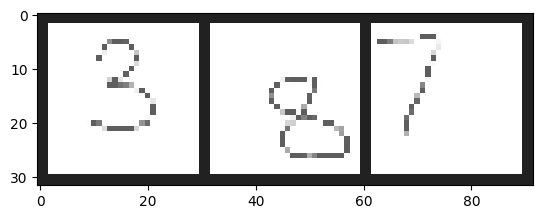

In [ ]:
#back to original 
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])  # Updated normalization for a single channel


trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)

classes = tuple(range(10))


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3)
        self.fc1 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = torch.flatten(x, 1) # Flatten the tensor
        x = self.fc1(x)
        return x

# Instantiate the CNN model
net = CNN()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

       # Move input and label tensors to the same device as the model
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

         # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        running_corrects += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 3700 == 3699:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f, accuracy: %.2f%%' %
                  (epoch + 1, i + 1, running_loss / 3700, (running_corrects / total_samples) * 100))
            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

print('Finished Training')

from google.colab import drive
drive.mount('/content/drive')


#Defining the path of the folder that contains our images 
path_testing = '/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment3/'

# Load training images and converting them to grayscale

img1 = cv2.imread(path_testing + "test1.png")
img1= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (28, 28))
img1 = transform(img1)

img2 = cv2.imread(path_testing + "test2.png")
img2= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2, (28, 28))
img2 = transform(img2)

img3 = cv2.imread(path_testing + "test3.png")
img3= cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img3 = cv2.resize(img3, (28, 28))
img3 = transform(img3)


test_images = torch.stack([img1, img2, img3], dim=0)

test_images = test_images.to(device)

# Pass the test_images tensor through the network to get predictions
with torch.no_grad():
    outputs = net(test_images)

# Get the predicted labels
_, predicted_labels = torch.max(outputs, dim=1)

# Print the predicted labels
print("Predicted labels:", predicted_labels.tolist())

def imshow(img):
    img = img * 0.3081 + 0.1307  # unnormalize (using MNIST mean and std)
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# print images

imshow(torchvision.utils.make_grid(test_images))

####1.5 Probabilistic Classifier with Naïve Bayes

<p align="justify"> For this part of the investigation, we have been tasked with creating a probalisitic classifier that makes a Naive Bayes assumption for the liklihood of a class. In order to do this we load the MNIST dataset and preprocess it in the same way we have done within the CNN implementation. Then, the MNIST dataset is loaded and preprocessed by converting the images to binary values using a threshold. Then, feature probabilities for each class are calculated by assuming a uniform prior. Then, using the function load_and_preprocess_images we load and preprocess the input images. The images are loaded using OpenCV, converted to grayscale, resized to match the MNIST size, and normalized. Afterward, the images are converted to binary using a threshold and flattened. The naive Bayes classifier is then applied to calculate the posterior probabilities for each class.

<p align="justify">As seen from our results, our classifier failed to perdict any of the test images sucessfully, this can be justified. The Naive Bayes classifier struggles to classify handwritten digits due to its assumption of feature independence and equal feature importance, which can be problematic when handling the complex patterns and spatial relationships in digit images and especially so in handwritten images.[5]

In [ ]:
##new naive classifier
!pip install numpy torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import torch
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset))

# Convert the train and test images to binary values using a threshold
threshold = 0.5
train_images, train_labels = next(iter(trainloader))
train_images = (train_images > threshold).numpy()

# Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1)

# Calculate feature probabilities for each class
num_classes = 10
feature_probs = np.zeros((num_classes, train_images.shape[1]))

for i in range(num_classes):
    class_examples = train_images[train_labels.numpy() == i]
    feature_probs[i] = np.mean(class_examples, axis=0)



#Defining the path of the folder that contains our images 
path_testing = '/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment3/'

def load_and_preprocess_image(file_path, threshold=0.5):
    # Load image using OpenCV and convert to grayscale
    image = cv2.imread(path_testing + file_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to match MNIST size (28x28)
    image = cv2.resize(image, (28, 28))

    # Normalize the image to the range [0, 1]
    image = transforms.ToTensor()(image)
    image = transforms.Normalize((0.1307,), (0.3081,))(image)

    # Convert the image to binary using the threshold
    image = (image.numpy().squeeze() > threshold).astype(float)

    # Flatten the image and return
    return image.reshape(-1)

# Load and preprocess images


file_paths = ["test1.png", "test2.png", "test3.png"]
your_images = np.array([load_and_preprocess_image(file_path) for file_path in file_paths])

epsilon = 1e-8

num_your_images = your_images.shape[0]
your_posteriors = np.zeros((num_your_images, num_classes))

# Add class priors (uniform)
class_priors = np.full(num_classes, 1 / num_classes)

for i, image in enumerate(your_images):
    log_likelihoods = np.zeros(num_classes)
    for j in range(num_classes):
        log_likelihoods[j] = np.sum(np.log((feature_probs[j] * image + (1 - feature_probs[j]) * (1 - image)) + epsilon))
    # Multiply by the class priors
    your_posteriors[i] = np.exp(log_likelihoods + np.log(class_priors) - np.max(log_likelihoods))
    your_posteriors[i] /= np.sum(your_posteriors[i])

# Print the posterior probabilities for images
for i in range(num_your_images):
    print(f"Your image {i + 1}: {your_posteriors[i]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Your image 1: [0.00000000e+000 0.00000000e+000 1.00000000e+000 1.02338666e-218
 3.17480231e-190 1.10806321e-123 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
Your image 2: [0.00000000e+000 0.00000000e+000 1.00000000e+000 1.02338666e-218
 3.17480231e-190 1.10806321e-123 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
Your image 3: [0.00000000e+000 0.00000000e+000 1.00000000e+000 1.02338666e-218
 3.17480231e-190 1.10806321e-123 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


####1.6 Conclusion on CNNs

<p align="justify">As seen from our results, we can gather that CNNs have certain limitations, which includes their sensitivity to small input transformations, difficulty handling variable-sized inputs, and high computational requirements. Additionally, they struggle with capturing some dependancies in sequences, which makes them less effective at capturing natrual 'edges'. [6]


##2. Stereo Vision

####2.1 Stereo Vision - Epipolar Geometry 

<p align="justify"> For this part of the investigation, we were tasked to implement epipolar geomtry between two stereo images in order to find perspective points between the images. 

<p align="justify"> The first step of this is to compute the matching sift keypoints between the two stereo images provided by the instructor. This implementation is based on that of our previous assignment. As seen below, the sift points are computed and the top 20 are displayed in the figure below. 

Mounted at /content/drive


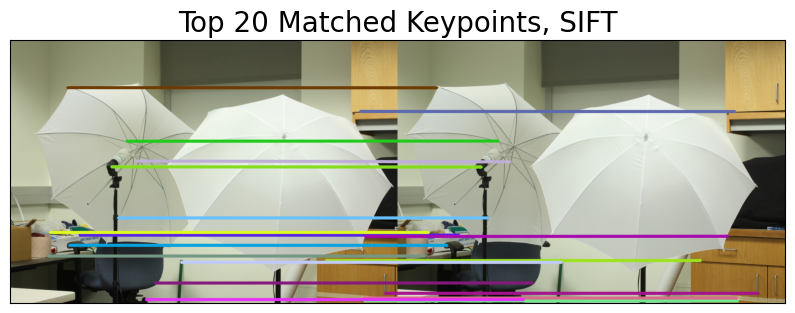

In [ ]:
#Importing the neccessary libraries to implement task
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier

# #Mounting the google drive which contains the images to be processed
from google.colab import drive
drive.mount('/content/drive')

path_testing = '/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment3/'

# For local run
# path_stitching= "/Users/karim/Desktop/Assignment2/Assignment2_Data/Q2/"

def resize_init(img):

  width = int(img.shape[1] * 0.4)
  height = int(img.shape[0] * 0.4)
  dim = (width, height)
# Resize the image
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return img

#Fetch image 1
img1_path = path_testing + "im0.png"
img1 = cv2.imread(img1_path)
img1 = resize_init(img1)

#Fetch image 2
img2_path = path_testing + "im1.png"
img2 = cv2.imread(img2_path)
img2 = resize_init(img2)


def compute_sift(img1, img2):

#Convert the images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Initialize the SIFT detector
    sift = cv2.SIFT_create()

#Compute the keypoints and descriptors for the two images
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

#Create a BFMatcher object
    bf = cv2.BFMatcher()

#Match the keypoints
    matches = bf.knnMatch(des1, des2, k=2)

#Apply ratio test 
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

# Sort the matches by distance
    good_matches = sorted(good_matches, key=lambda x: x.distance)
# Take only the top 20 matches
    good_matches = good_matches[:20]

# Draw the 20 best matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, 8, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=None, singlePointColor=None)

    return kp1, des1, kp2, des2, good_matches, img_matches

kp12, des12, kp21, des21, matches12, drawn_image = compute_sift(img1, img2)

# Display the matches
fig = plt.figure(figsize=(10, 10))
plt.title("Top 20 Matched Keypoints, SIFT", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(drawn_image, cv2.COLOR_BGR2RGB))
plt.show()

####2.2 Epipolar Lines

<p align="justify"> We were then tasked with calculating the epipolar lines between the two images. These epipolar lines describe the geometric relationship between the two cameras observing the same 3D scene.

<p align="justify">The two images are loaded and preproccesed using the 'resize_init' function. SIFT is used to detect keypoints and compute descriptors in both images as described above. Then, a Brute-Force Matcher is employed to find the best two matches for each descriptor. After removing unreliable matches, the fundamental matrix 'F' is calculated using the least-median function cv2.FM_LMEDS. The inlier points are then used to compute epilines between both images. The 'drawlines' function is used to draw epilines. It is noted that this implementation is based on that of ECSE 415's Tutorial by Amar Kumar [7].



Image size: 1184 x 803
Image size: 1184 x 803


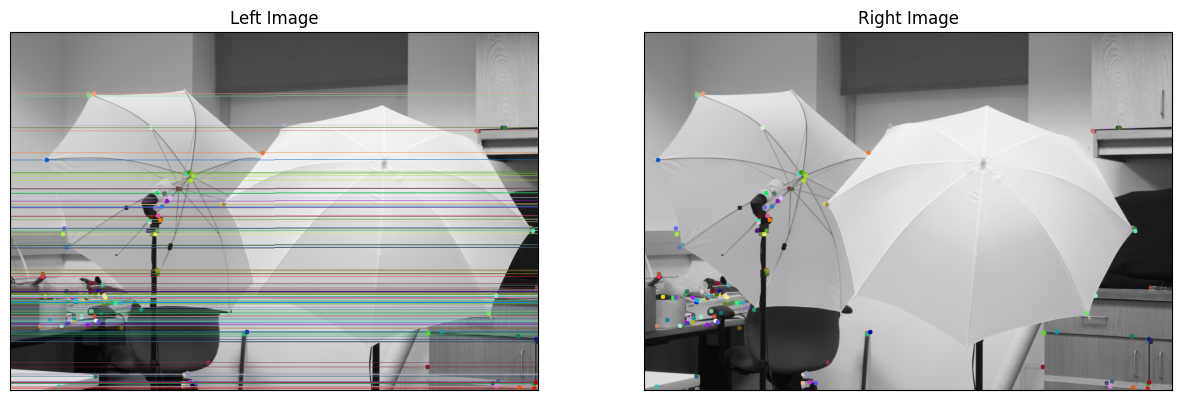

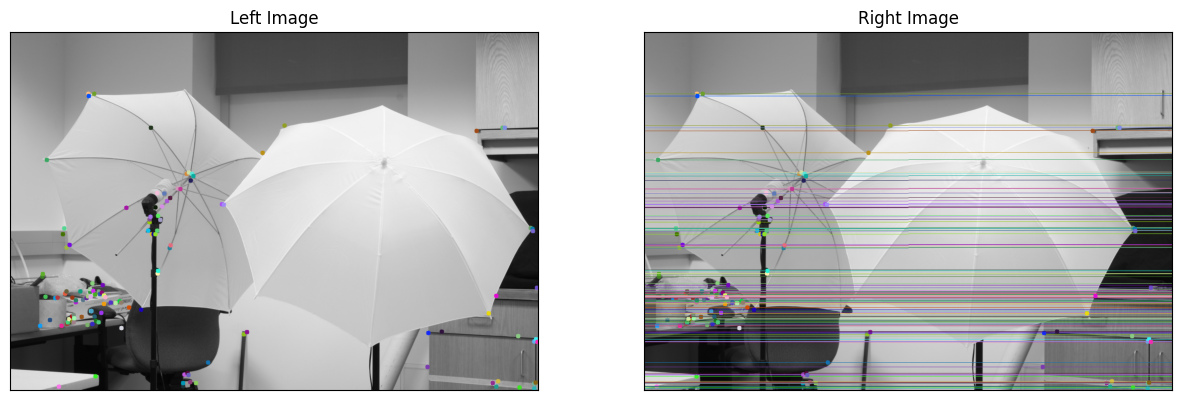

In [ ]:
#  !pip install opencv-python==4.4.0.44
#  !pip install opencv-contrib-python==4.4.0.44

import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import mixture

""" drawlines """
def drawlines(img1, img2, lines, pts1, pts2):
    """
    Draw epilines. Epilines corresponding to the points in 
    the first image are drawn on the second image.
    :param img1: image on which we draw the epilines for the points
            in img2
    :param lines: corresponding epilines
    """
    # img1 shape
    row, col = img1.shape
    # convert from grayscale to BGR
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # for each line
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        # pick a random color
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [col, -(r[2]+r[0]*col)/r[1]])
        # draw the lines and the points
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

# load left and right images
imgL = cv2.imread(path_testing +"im0.png", cv2.IMREAD_GRAYSCALE)
imgL = resize_init(imgL)
height, width = imgL.shape
print("Image size:", width, "x", height)
imgR = cv2.imread(path_testing +"im1.png", cv2.IMREAD_GRAYSCALE)
imgR = resize_init(imgR)
height, width = imgR.shape
print("Image size:", width, "x", height)

# the fundamental matrix
sift = cv2.xfeatures2d.SIFT_create()
# create a Brute-Force Matcher
bfMatcher = cv2.BFMatcher(cv2.NORM_L2)

# find keypoints and descriptors with SIFT
kpL, desL = sift.detectAndCompute(imgL, None)
kpR, desR = sift.detectAndCompute(imgR, None)

# Now, we want to match keypoints and remove matches on repeatative structure.
# match descriptors (find the best two matches for each descriptor)
matches = bfMatcher.knnMatch(desL, desR, k=2) # query image, train image

# ratio test - store the list of best matches from both images
good = []
ptsL = []
ptsR = []
for i, (m, n) in enumerate(matches):
    if m.distance < 0.75 * n.distance:
        good.append(m)
        ptsR.append(kpR[m.trainIdx].pt)
        ptsL.append(kpL[m.queryIdx].pt)

# find the Fundamental Matrix
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS) # least-median algorithm

# Use only inliers for remaining computations
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]

# find epilines
# Epilines corresponding to points in the first image is drawn on the
# second image
linesL = cv2.computeCorrespondEpilines(ptsR, 2, F)
linesL = linesL.reshape(-1, 3)
# draw lines
imgL1, imgR1 = drawlines(imgL, imgR, linesL, ptsL, ptsR)

linesR = cv2.computeCorrespondEpilines(ptsL, 1, F)
linesR = linesR.reshape(-1, 3)
# draw lines
imgR2, imgL2 = drawlines(imgR, imgL, linesR, ptsR, ptsL)


# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL1, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR1, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(imgL2, cmap="gray")
plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgR2, cmap="gray")
plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.show()

####2.3 Patch Extraction

<p align="justify"> Then, we commenced the epipolar analysis by extracting a matching point in both images. We did this by picking any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line, then we extracted a patch of size (5 × 5) around this keypoint in the left image as seen in the figure below. 

[ 67 659]
[ 29 659]
Top-left corner of patch_left: (65, 657)
Bottom-right corner of patch_left: (70, 662)


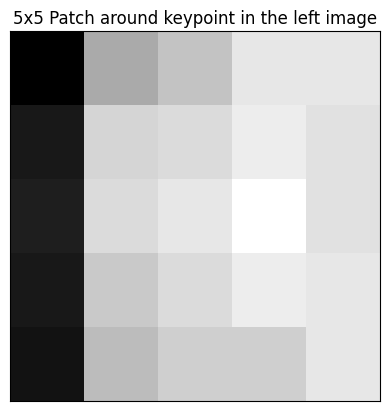

In [ ]:
#Get the first point in the matched points
keypoint_index = 0
keypoint_left = ptsL[keypoint_index]
keypoint_right = ptsR[keypoint_index]
print(keypoint_left)
print(keypoint_right)

#extract 5 by 5 patch
patch_left = imgL[keypoint_left[1]-2:keypoint_left[1]+3, keypoint_left[0]-2:keypoint_left[0]+3]

# Get the coordinates of the top-left and bottom-right corners of patch_left
top_left_corner = (keypoint_left[0] - 2, keypoint_left[1] - 2)
bottom_right_corner = (keypoint_left[0] + 3, keypoint_left[1] + 3)

print("Top-left corner of patch_left:", top_left_corner)
print("Bottom-right corner of patch_left:", bottom_right_corner)

plt.figure()
plt.imshow(patch_left, cmap='gray')
plt.title('5x5 Patch around keypoint in the left image')
plt.xticks([])
plt.yticks([])
plt.show()


####2.4 Matching Points Between Images

<p align="justify">Once we extracted a point from the left image, we commenced to match the extracted patch to every 5 × 5 patch along the corresponding epipolar line in the right image, using the normalized cross-correlation metric for matching. 

####2.5 Normalized Cross-Correlation
We do this by defining a function to calculate the distance from a point to a line and use it to find corresponding points in stereo images along the epipolar line. It iterates through each pixel in the right image, checks if it lies on the epipolar line, and then computes the normalized cross-correlation between a 5x5 patch around that pixel and a patch from the left image. We also maintain a list of cross-correlation values and corresponding patch indices while tracking the best match with the highest NCC.

Best match: [172 659]


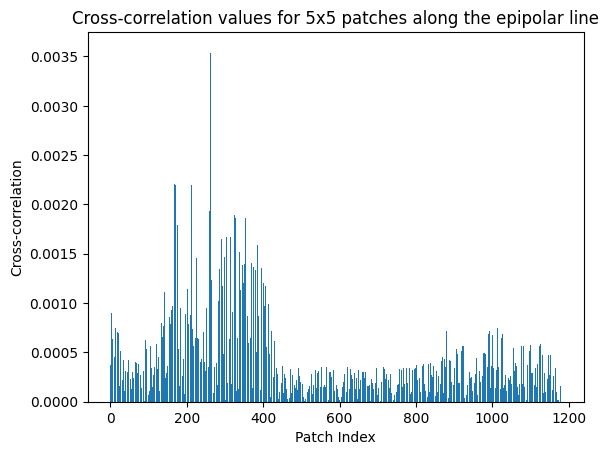

In [ ]:
def distance_to_line(point, line):
    return abs(line[0] * point[0] + line[1] * point[1] + line[2]) / np.sqrt(line[0] ** 2 + line[1] ** 2)

epipolar_line = linesR[keypoint_index]
# Initialize a list to store the cross-correlation values and the corresponding patch indices
cross_correlations = []
patch_indices = []
best_match = None
best_ncc = -1
patch_index = 0

for y in range(2, imgR.shape[0] - 2):
    for x in range(2, imgR.shape[1] - 2):
        point = np.array([x, y])

        # Check if the point is on the epipolar line with threshold
        if distance_to_line(point, epipolar_line) < 0.001:
            # Extract a 5x5 patch around the point on the right epipolar line
            patch_right = imgR[y-2:y+3, x-2:x+3]

            # Compute the normalized cross-correlation between the patches
            ncc = (np.correlate(patch_left.flatten(), patch_right.flatten()) / (np.linalg.norm(patch_left) * np.linalg.norm(patch_right))).item()

            # Add the cross-correlation value and the corresponding patch index to the lists
            cross_correlations.append(ncc)
            patch_indices.append(patch_index)

            # Update the best match if the current NCC is higher than the previous best
            if ncc > best_ncc:
                best_ncc = ncc
                best_match = point

            patch_index += 1

print("Best match:", best_match)

# Plot the cross-correlation values for each patch along the epipolar line as a bar graph
plt.figure()
plt.bar(patch_indices, cross_correlations)
plt.xlabel("Patch Index")
plt.ylabel("Cross-correlation")
plt.title("Cross-correlation values for 5x5 patches along the epipolar line")
plt.show()

####2.6 Discussion of Results

<p align="justify">As seen from the extracted points below, we found that our implementation did not succeed in finding a matching point within the two stereo images. This could be due to the simplicity of the algorithim's calculation of the relation of points within the image. More specifically, as these images' disparity is very minimal it is more challenging for cross-correlation to distinguish between correct and incorrect matches, particularly in regions with low texture or repetitive patterns. In such cases, the cross-correlation values for multiple patches along the epipolar line might be similar, making it difficult to identify the correct match. This is seen espacially as the point matched in the images (black circle), lie in the same epipolar line and are of similar colors.[8]




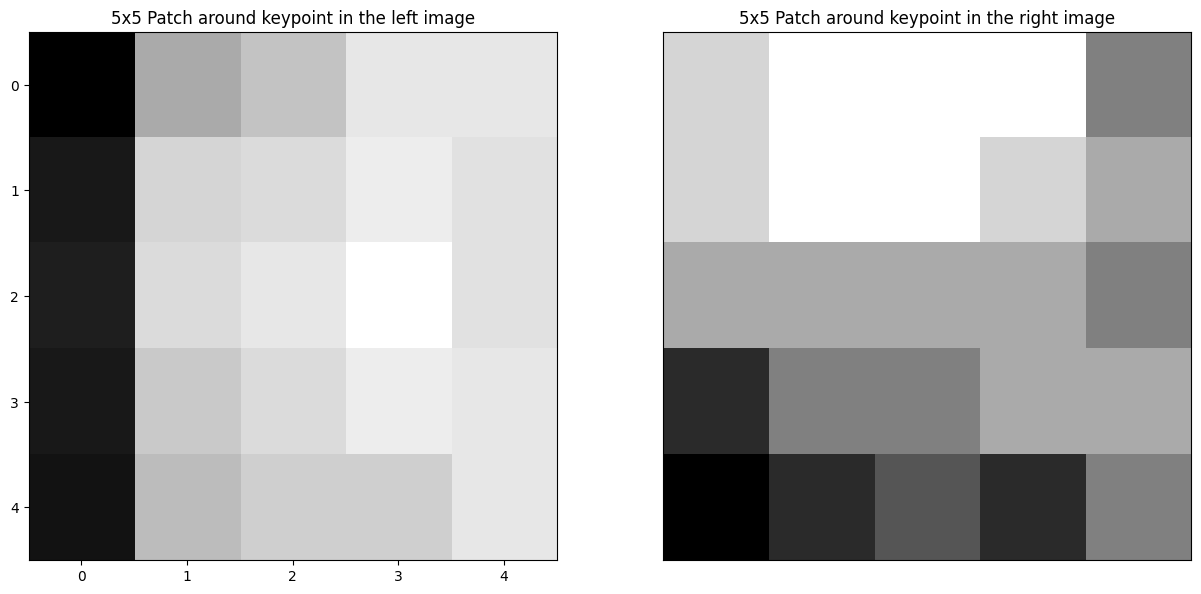

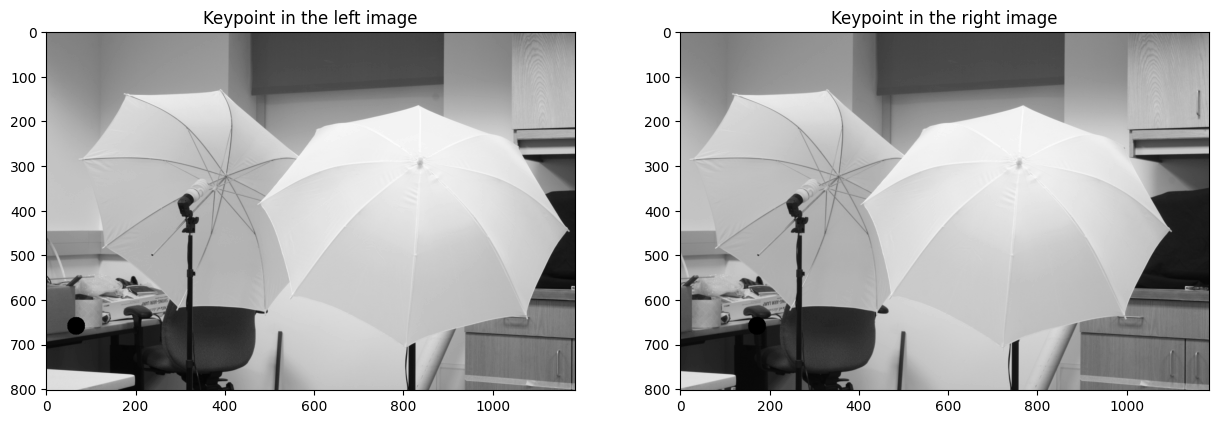

In [ ]:
patch_right = imgR[best_match[1]-2:best_match[1]+3, best_match[0]-2:best_match[0]+3]

def draw_point_on_image(image, point, color=(0, 0, 255), radius=2, thickness=-1):
    # Make a copy of the image to avoid modifying the original
    image_copy = np.copy(image)

    # Draw the point on the image copy using cv2.circle()
    cv2.circle(image_copy, point, radius, color, thickness)

    # Return the image copy with the point drawn on it
    return image_copy

point_in_right = draw_point_on_image(imgR, best_match, radius = 20, thickness=-1)
point_in_left = draw_point_on_image(imgL, keypoint_left, radius = 20, thickness=-1 )

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(patch_left, cmap='gray')
plt.title('5x5 Patch around keypoint in the left image')
plt.subplot(1,2,2), plt.imshow(patch_right, cmap='gray')
plt.title('5x5 Patch around keypoint in the right image')
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(point_in_left, cmap='gray' )
plt.title('Keypoint in the left image')
plt.subplot(1,2,2), plt.imshow(point_in_right, cmap='gray' )
plt.title('Keypoint in the right image')
plt.show()

##3. Motion Algorithim

####3.1 Multi-Resolution Lucas-Kanade Optic Flow Detection
<p align="justify">For this part of the investigation, we were tasked with implementing a motion 'detection' algorithim; namely, the multi-resolution Lucas-Kanade optic flow detection. We were given two images of the same scene, seemingly seconds or microseconds apart; and from them we extract good points to track from ‘frame1.png’ using the Harris corner detection algorithm. Then using the function goodFeaturesToTrack and with a maxCorners value of 500, we extracted these points. It is noted that during the implementation of this, many parameters were used to explore the optimal hyperparameters; through trial and error, we have arrived at the values seen below. 


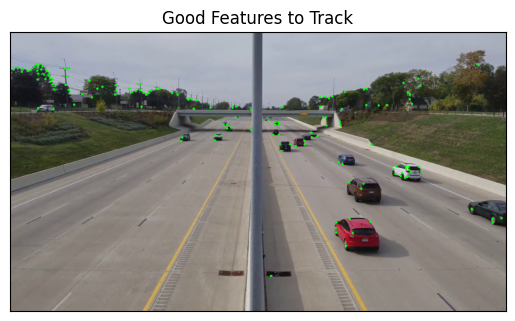

In [ ]:
import cv2
import numpy as np

# Load the image and convert it to grayscale
img1_path = path_testing + "frame1.png"
image = cv2.imread(img1_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set the parameters for goodFeaturesToTrack
max_corners = 500
quality_level = 0.05 
min_distance = 7   
block_size = 4    
use_harris = True
k = 0.04              

# Detect good points to track using Harris corner detection
p1 = cv2.goodFeaturesToTrack(gray_image, max_corners, quality_level, min_distance, blockSize=block_size, useHarrisDetector=use_harris, k=k)

# Visualize the detected points (optional)
image_with_points = np.copy(image)
for point in p1:
    x, y = map(int, point.ravel())
    cv2.circle(image_with_points, (x, y), 3, (0, 255, 0), -1)


image_with_points = cv2.cvtColor(image_with_points, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image_with_points)
plt.title('Good Features to Track')
plt.xticks([])
plt.yticks([])
plt.show()


####3.2 Optical Flow

<p align="justify">Once we fetched the good features to track, we  began to compute the optical flow between 'frame1.png’ (seen above) and ‘frame2.png’ at the points fetched in the preceding section. It is noted that this implementation is based on that of ECSE 415's Tutorial 11 [7]. We achieve this using the calcOpticalFlowPyrLK function. 

####3.3 Optical Flow Output

<p align="justify">Then, by utilizing the same tutorial discussed previously, we displayed the optical flow calculated as line vectors as seen below. 

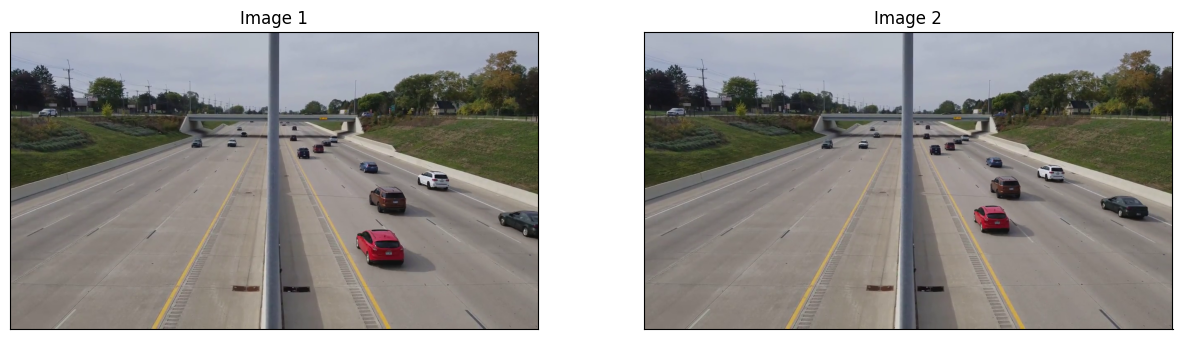

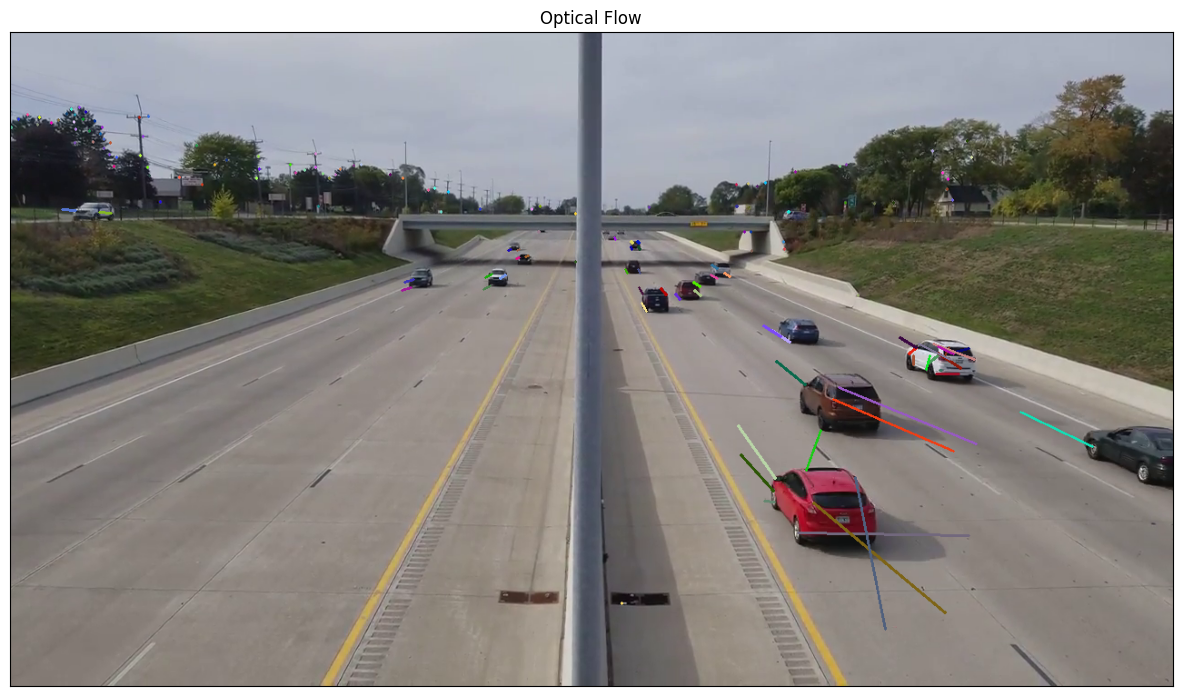

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread(path_testing+"frame1.png")
img2 = cv2.imread(path_testing+"frame2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


# find good corners in the first image
# Ref: https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541
# Parameters
#          image	Input 8-bit or floating-point 32-bit, single-channel image.
#          corners	Output vector of detected corners.
#          maxCorners	Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned. maxCorners <= 0 implies that no limit on the maximum is set and all detected corners are returned.
#          qualityLevel	Parameter characterizing the minimal accepted quality of image corners. 
#                       The parameter value is multiplied by the best corner quality measure, 
#                       which is the minimal eigenvalue (see cornerMinEigenVal ) or the Harris function response (see cornerHarris ). 
#                       The corners with the quality measure less than the product are rejected. 
#                       For example, if the best corner has the quality measure = 1500, 
#                       and the qualityLevel=0.01 , 
#                       then all the corners with the quality measure less than 15 are rejected.
#          minDistance	Minimum possible Euclidean distance between the returned corners.
#          mask	Optional region of interest. If the image is not empty (it needs to have the type CV_8UC1 and the same size as image ), it specifies the region in which the corners are detected.
#          blockSize	Size of an average block for computing a derivative covariation matrix over each pixel neighborhood. See cornerEigenValsAndVecs .
#          useHarrisDetector	Parameter indicating whether to use a Harris detector (see cornerHarris) or cornerMinEigenVal.
#          k	Free parameter of the Harris detector. 



p0 = cv2.goodFeaturesToTrack(img1_gray, max_corners, quality_level, min_distance, blockSize=block_size, useHarrisDetector=use_harris, k=k)


# calculate optical flow
# https://docs.opencv.org/master/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323
# Parameters
#          prevImg	first 8-bit input image or pyramid constructed by buildOpticalFlowPyramid.
#          nextImg	second input image or pyramid of the same size and the same type as prevImg.
#          prevPts	vector of 2D points for which the flow needs to be found; 
#                   point coordinates must be single-precision floating-point numbers.
#          nextPts	output vector of 2D points (with single-precision floating-point coordinates) 
#                   containing the calculated new positions of input features in the second image; 
#                   when OPTFLOW_USE_INITIAL_FLOW flag is passed, the vector must have the same size as in the input.
#          status	output status vector (of unsigned chars); 
#                   each element of the vector is set to 1 if the flow for the corresponding features has been found, 
#                   otherwise, it is set to 0.
#          err	output vector of errors; each element of the vector is set to an error for the corresponding feature, 
#               type of the error measure can be set in flags parameter; 
#               if the flow wasn't found then the error is not defined (use the status parameter to find such cases).
#          winSize	size of the search window at each pyramid level.
#          maxLevel	0-based maximal pyramid level number; if set to 0, pyramids are not used (single level), 
#                   if set to 1, two levels are used, and so on; 
#                   if pyramids are passed to input then algorithm will use as many levels as pyramids have but no more than maxLevel.
#          criteria	parameter, specifying the termination criteria of the iterative search algorithm 
#                   (after the specified maximum number of iterations criteria.maxCount or 
#                    when the search window moves by less than criteria.epsilon.
#          flags	operation flags:
#                   OPTFLOW_USE_INITIAL_FLOW: uses initial estimations, stored in nextPts; 
#                                             if the flag is not set, then prevPts is copied to nextPts 
#                                             and is considered the initial estimate.
#                   OPTFLOW_LK_GET_MIN_EIGENVALS: use minimum eigen values as an error measure 
#                                                 (see minEigThreshold description); 
#                                                 if the flag is not set, 
#                                                 then L1 distance between patches around the original 
#                                                 and a moved point, divided by number of pixels in a window, 
#                                                 is used as a error measure.
#          minEigThreshold	the algorithm calculates the minimum eigen value of a 2x2 normal matrix of 
#                           optical flow equations (this matrix is called a spatial gradient matrix in [25]), 
#                           divided by number of pixels in a window; 
#                           if this value is less than minEigThreshold, 
#                           then a corresponding feature is filtered out and its flow is not processed, 
#                           so it allows to remove bad points and get a performance boost.

# parameters for lucas kanade optical flow
lk_params = dict( winSize = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                             10, 0.03))

p1, st, _ = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)

# select good points
good_new = p1[st==1]
good_old = p0[st==1]


# create some random colors
color = np.random.randint(0, 255, (good_new.shape[0], 3))

# create a mask image for drawing purposes
mask = img1.copy()

# draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = np.int0(np.round(new.ravel()))
    c, d = np.int0(np.round(old.ravel()))
    mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)

mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.title("Optical Flow"), plt.xticks([]), plt.yticks([])
plt.show()


####3.4 Variations of Pyramid Levels Hyperparamter
<P align="justify">Once we implemented the pipeline to find the optical flow between the two images, we commenced to explore the hyperparameter of the pyramid levels. To do this, we varied the maximum pyramid level from 0 to 10 in the function calcOpticalFlowPyrLK. For each setting, we computed the mean of the error at those points whose correspondence search returned a status of 1. We plotted this mean of error on the y axis, with the pyramid level on the x axis. 

<P align="justify">As seen from our results, the mean error decreases as the pyramid levels increase; allowing us to justify that the algorithm is able to track points more accurately. This makes sense as higher pyramid levels capture more detail from the given image. The algorithm then can handle larger displacements and different image scales, which can lead to improved tracking accuracy. However, this accuaracy platues eventually to some point; within our results the error platues at around 4 pyramid levels. This is also plausabile as the details extracted from the image is a finite limited quantity, once the maximum amount of detail is extracted, the algorithim can not decrease the ammount of error further. 

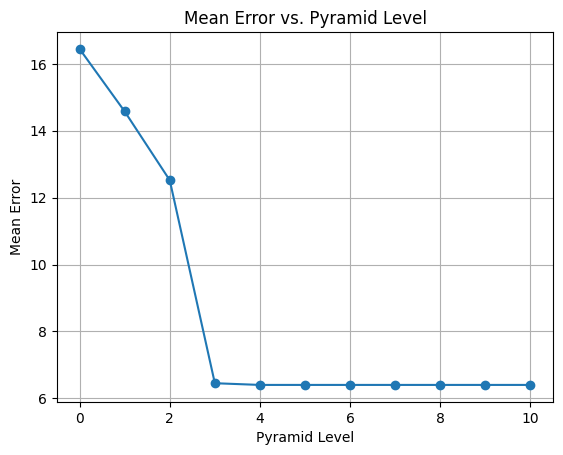

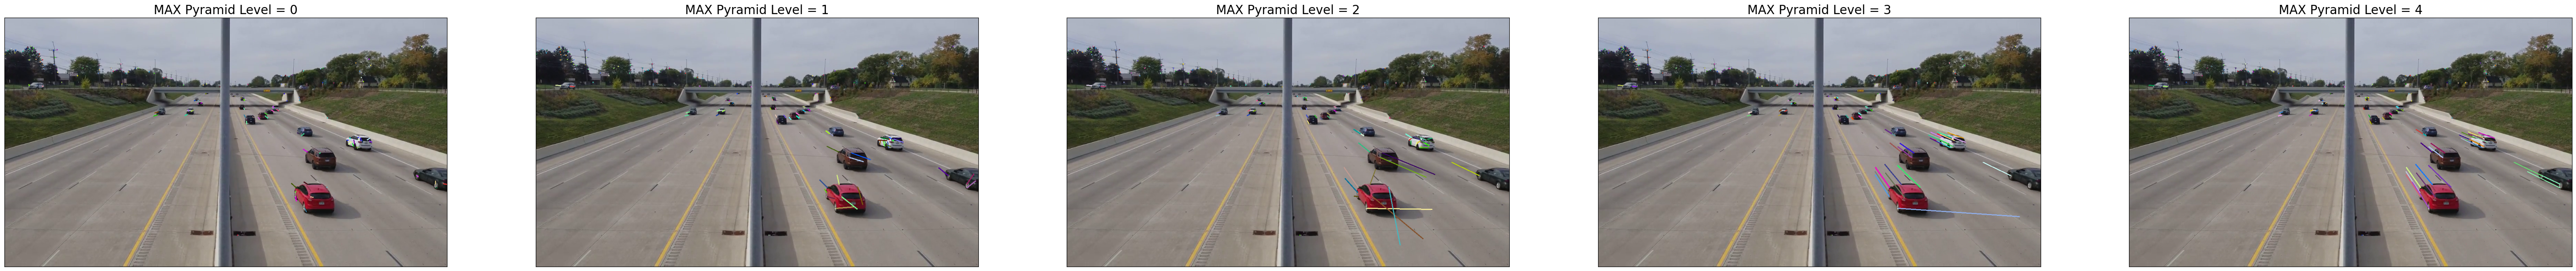

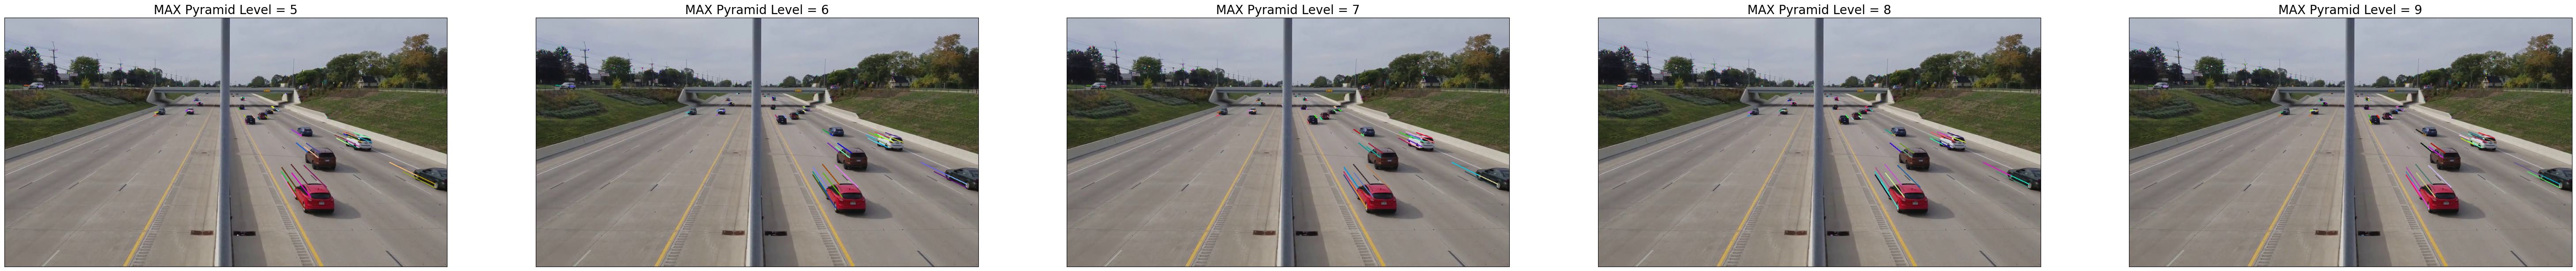

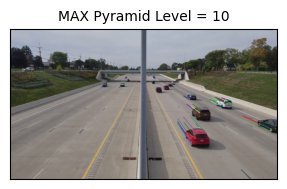

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread(path_testing+"frame1.png")
img2 = cv2.imread(path_testing+"frame2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# create a list to store the mean errors for each pyramid level
mean_errors = []

# create a list to store drawn images
optical_flows = []

# loop through pyramid levels from 0 to 10
for max_level in range(11):
    # update the maxLevel parameter in lk_params dictionary
    lk_params["maxLevel"] = max_level
    
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)
 
    # compute mean error for points with successful correspondence search (status == 1)
    mean_error = err[st==1].mean()
    
    # append the mean error to the list
    mean_errors.append(mean_error)

    # select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # create a mask image for drawing purposes
    mask = img1.copy()

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = np.int0(np.round(new.ravel()))
        c, d = np.int0(np.round(old.ravel()))
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    optical_flows.append(mask)


# plot the mean error vs. pyramid level
plt.figure()
plt.plot(range(11), mean_errors, marker='o')
plt.xlabel("Pyramid Level")
plt.ylabel("Mean Error")
plt.title("Mean Error vs. Pyramid Level")
plt.grid()
plt.show()

# Displaying the original images, Kraft
plt.figure(figsize=(75, 25))
plt.subplot(1,5,1), plt.imshow(optical_flows[0], cmap="gray")
plt.title("MAX Pyramid Level = 0", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.imshow(optical_flows[1], cmap="gray")
plt.title("MAX Pyramid Level = 1", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(optical_flows[2], cmap="gray")
plt.title("MAX Pyramid Level = 2", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(optical_flows[3], cmap="gray")
plt.title("MAX Pyramid Level = 3", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(optical_flows[4], cmap="gray")
plt.title("MAX Pyramid Level = 4", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()

# Displaying the original images, Kraft
plt.figure(figsize=(75, 25))
plt.subplot(1,5,1), plt.imshow(optical_flows[5], cmap="gray")
plt.title("MAX Pyramid Level = 5", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.imshow(optical_flows[6], cmap="gray")
plt.title("MAX Pyramid Level = 6", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(optical_flows[7], cmap="gray")
plt.title("MAX Pyramid Level = 7", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(optical_flows[8], cmap="gray")
plt.title("MAX Pyramid Level = 8", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(optical_flows[9], cmap="gray")
plt.title("MAX Pyramid Level = 9", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()

# Displaying the original images, Kraft
plt.figure(figsize=(20, 20))
plt.subplot(1,5,3), plt.imshow(optical_flows[10], cmap="gray")
plt.title("MAX Pyramid Level = 10", fontsize = 10), plt.xticks([]), plt.yticks([])

plt.show()

####3.5 Output Images
<p align="justify"> As seen from the results above, we can trace the trend of the grpah from the ammount of error within the image. For example, at pyarmid level = 2, we see many errors within the optical flow analysis, especially in the direction of the vectors. While on the other hand, the results start to look very similar, and accurate once we reach 4 pyramid levels. 

##Works Cited

[1] LeCun, Y., Cortes, C., and Burges, C. J. C., "The MNIST Database of Handwritten Digits," 1998. [Online]. Available: http://yann.lecun.com/exdb/mnist/

[2] I. Goodfellow, Y. Bengio, and A. Courville, "Deep Learning," MIT Press, 2016. [Online]. Available: http://www.deeplearningbook.org

[3] N. S. Keskar, D. Mudigere, J. Nocedal, M. Smelyanskiy, and P. Tang, "On Large-Batch Training for Deep Learning: Generalization Gap and Sharp Minima," arXiv preprint arXiv:1609.04836, 2016. [Online]. Available: https://arxiv.org/abs/1609.04836

[4] X. Glorot and Y. Bengio, "Understanding the difficulty of training deep feedforward neural networks," in Proceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics (AISTATS), Sardinia, Italy, May 13-15, 2010, pp. 249-256. [Online]. Available: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

[5] Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner, "Gradient-based learning applied to document recognition," Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, 1998.

[6] A. Krizhevsky, I. Sutskever, and G. E. Hinton, "ImageNet classification with deep convolutional neural networks," in Advances in Neural Information Processing Systems, pp. 1097-1105, 2012.

[7] A. Kumar, "Tutorial for ECSE 415: Introduction to Computer Vision," McGill University, Montreal, Canada.

[8] D. Scharstein and R. Szeliski, "A taxonomy and evaluation of dense two-frame stereo correspondence algorithms," International Journal of Computer Vision, vol. 47, no. 1-3, pp. 7-42, Apr. 2002.